<a href="https://colab.research.google.com/github/emad550/AI_DS/blob/main/Emad_Excercise_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#import liberaries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [46]:
# load the dataset here
(Xtrain, Ytrain), (Xtest, Ytest) = datasets.cifar10.load_data()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1]')

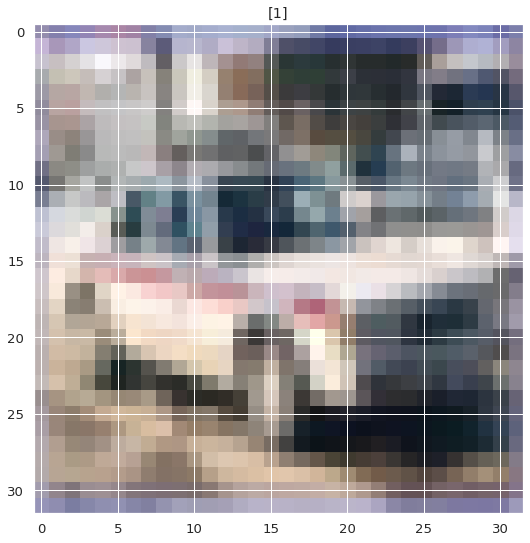

In [47]:
# index a random batch of the images, targets array and plot it
i = np.random.randint(0, 1000)

plt.imshow(Xtrain[i], "gray")   
# plt.grid(True)
plt.title(Ytrain[i])

In [48]:
N_train_imgs = Xtrain.shape[0]
N_test_imgs = Xtest.shape[0]


Xtrain = Xtrain.reshape(N_train_imgs, -1)
Xtrain = Xtrain / 255. 
Ytrain = to_categorical(Ytrain)

Xtest = Xtest.reshape(N_test_imgs, -1)
Xtest = Xtest / 255. 
Ytest = to_categorical(Ytest)


print("Xtrain shape: ", Xtrain.shape, "ytrain shape: ", Ytrain.shape)
print("Xtest shape: ", Xtest.shape, "Ytest shape: ", Ytest.shape)


Xtrain shape:  (50000, 3072) ytrain shape:  (50000, 10)
Xtest shape:  (10000, 3072) Ytest shape:  (10000, 10)


In [49]:
model = Sequential([
    Dense(units=32, activation='relu', input_shape=[3072]),
    #Dropout(0.2),
    Dense(units=64, activation='relu'),
    #Dropout(0.2),
    #Dense(units=128, activation='relu'),
    #Flatten(),

    Dense(units=10, activation="softmax")
])






In [50]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                98336     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 101,098
Trainable params: 101,098
Non-trainable params: 0
_________________________________________________________________


In [51]:
# configure the loss and optimizer and the metrics for the training
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.85,
                         min_lr = 1e-6)

mcp = ModelCheckpoint("./model", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=["acc"] )

In [52]:
# feed the data and train the network
history = model.fit(Xtrain, Ytrain, validation_split=0.25, batch_size=32, epochs=50,callbacks=[lrd, mcp, es])

Epoch 1/50
1172/1172 [==============================] - 4s 3ms/step - loss: 2.0449 - acc: 0.2305 - val_loss: 1.8607 - val_acc: 0.3174

Epoch 00001: val_loss improved from inf to 1.86068, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 2/50
1172/1172 [==============================] - 4s 3ms/step - loss: 1.8556 - acc: 0.3153 - val_loss: 1.8414 - val_acc: 0.3274

Epoch 00002: val_loss improved from 1.86068 to 1.84136, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 3/50
1172/1172 [==============================] - 4s 4ms/step - loss: 1.8351 - acc: 0.3280 - val_loss: 1.8431 - val_acc: 0.3279

Epoch 00003: val_loss did not improve from 1.84136
Epoch 4/50
1172/1172 [==============================] - 3s 3ms/step - loss: 1.8154 - acc: 0.3389 - val_loss: 1.8278 - val_acc: 0.3323

Epoch 00004: val_loss improved from 1.84136 to 1.82785, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 5/50
1172/1172 [=

In [1]:
# plot the loss history [train_loss, validation_loss] in a plot
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

NameError: ignored

In [ ]:
#we can use keras tuner but me be will do it later 

'''def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model'''
    